<a href="https://colab.research.google.com/github/djswoosh/Uni-Bits/blob/main/Heart_Disease_Dataset_Imputations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

df = pd.read_csv("/content/processed.hungarian.csv",
                 sep= ",",
                 names = ["age", "sex", "cp", "treatbps", "chol", "fbs", 
                          "reastecg", "thalach", "exang", "oldpeak", 
                          "slope", "ca", "thal", "num"])
df.head()

,age,sex,cp,treatbps,chol,fbs,reastecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [5]:
df.info()

#Object Types reflect the fact that 
#Pandas treats data types where it caanot infer the data type as objects
#Columns with missing data will have a Question Mark, and treated as Strings
#But the remainder of the data in the colums is a Float Type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    int64  
 1   sex       294 non-null    int64  
 2   cp        294 non-null    int64  
 3   treatbps  294 non-null    object 
 4   chol      294 non-null    object 
 5   fbs       294 non-null    object 
 6   reastecg  294 non-null    object 
 7   thalach   294 non-null    object 
 8   exang     294 non-null    object 
 9   oldpeak   294 non-null    float64
 10  slope     294 non-null    object 
 11  ca        294 non-null    object 
 12  thal      294 non-null    object 
 13  num       294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB


The Next thing to do is to replace the Question mark with NAN Values

In [10]:
import numpy as np

def replace_question_mark(val):
    if val == "?":
        return np.NaN
    elif type(val) ==int:
        return val
    else:
        return float (val)

df2 = df.copy()
for (columnName, _) in df2.iteritems():
  df2[columnName] = df2[columnName].apply(replace_question_mark)

In [11]:
df2.info() #AfterApplicationofabovefunctionPandas can now read the data types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    int64  
 1   sex       294 non-null    int64  
 2   cp        294 non-null    int64  
 3   treatbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   reastecg  293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        3 non-null      float64
 12  thal      28 non-null     float64
 13  num       294 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 32.3 KB


In [15]:
df2.head() #Nan Values are treted as legitimate numerical values in Python 
           #and legitimate Numpy fucntions can be used on them

,age,sex,cp,treatbps,chol,fbs,reastecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,NaN,NaN,NaN,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0
2,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,NaN,NaN,NaN,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,NaN,NaN,6.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,NaN,NaN,NaN,0


In [13]:
df2.dropna().shape

(1, 14)

In [16]:
df2.describe() #ThisFunctionGenerates a Quick table of statistics

,age,sex,cp,treatbps,chol,fbs,reastecg,thalach,exang,oldpeak,slope,ca,thal,num
count,294.000000,294.000000,294.000000,293.000000,271.000000,286.000000,293.000000,293.000000,293.000000,294.000000,104.000000,3.0,28.000000,294.000000
mean,47.826531,0.724490,2.982993,132.583618,250.848708,0.069930,0.218430,139.129693,0.303754,0.586054,1.894231,0.0,5.642857,0.360544
std,7.811812,0.447533,0.965117,17.626568,67.657711,0.255476,0.460868,23.589749,0.460665,0.908648,0.338995,0.0,1.615074,0.480977
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,1.000000,0.0,3.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,209.000000,0.000000,0.000000,122.000000,0.000000,0.000000,2.000000,0.0,5.250000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,243.000000,0.000000,0.000000,140.000000,0.000000,0.000000,2.000000,0.0,6.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,282.500000,0.000000,0.000000,155.000000,1.000000,1.000000,2.000000,0.0,7.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,3.000000,0.0,7.000000,1.000000


Text(0, 0.5, 'count')

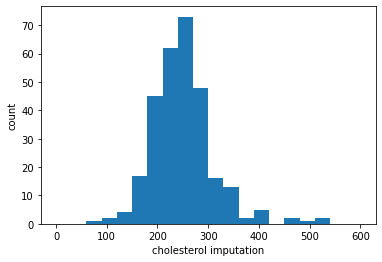

In [25]:
#Imputation with mean or median Values

import matplotlib.pyplot as plt


chol = df2["chol"]
plt.hist(chol.apply(lambda x: np.mean(chol) if np.isnan(x) else x), bins=range(0,630,30))
plt.xlabel("cholesterol imputation")
plt.ylabel("count")

(Text(0, 0.5, 'count'),)

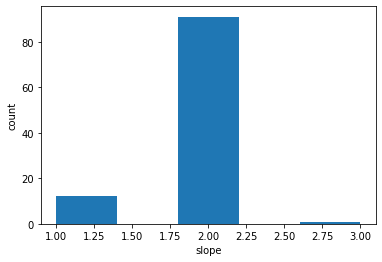

In [26]:
plt.hist(df2["slope"], bins = 5)
plt.xlabel("slope")
plt.ylabel("count"),

(Text(0, 0.5, 'count'),)

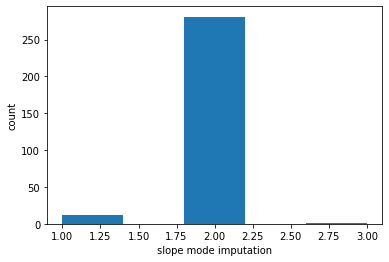

In [27]:
plt.hist(df2["slope"].apply(lambda x: 2 if np.isnan(x) else x), bins = 5)
plt.xlabel("slope mode imputation")
plt.ylabel("count"),

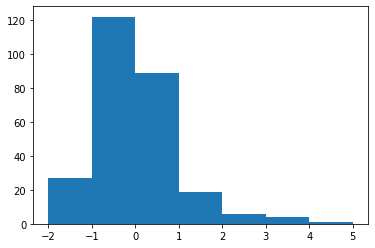

In [28]:
#Standardization

stdChol= np.std(chol)
meanChol = np.mean(chol)
chol2 = chol.apply  (lambda x: (x-meanChol)/stdChol)
plt.hist(chol2, bins = range(int (min(chol2)), int(max(chol2))+1,1));